# Definitions

import libraries and set file/sheet names for parsing

In [1]:
import pandas
import openpyxl

FILENAME = 'excel-files/ukbusinessworkbook2021.xlsx'
SAMPLE_SHEET = 'Table 1'

# Openpyxl

load the excel file using openpyxl and inspect sheets

In [2]:
wb = openpyxl.load_workbook(FILENAME)

In [3]:
wb.sheetnames[:5]

['Notes', 'Contents', 'Table 1', 'Table 2', 'Table 3']

In [4]:
sheet = wb[SAMPLE_SHEET]
sheet

<Worksheet "Table 1">

# Header

In [5]:
from openpyxl.worksheet.worksheet import Worksheet

The table title is contained somewhere on the top row, but the cell will depend on how many columns are used for indexing

loop through top row and return 0-indexed value for first cell that has values in it

In [6]:
class SearchException(Exception):
    pass
def get_header_col(ws: Worksheet, stop_search: int = 10000) -> int:
    i = 0
    while sheet.cell(1, i+1).value is None: # cell() is indexed from 1
        i += 1
        if stop_search and i > stop_search:
            raise SearchException
    return i

In [7]:
get_header_col(sheet)

2

# Info

Want a generic function that gets information from a spreadsheet extracting its title at the top and rows/columns used for data

In [8]:
from typing import TypedDict, List

In [9]:
class SheetInfo(TypedDict):
    title: str
    subtitle: str
    title_rows: List[int]
    index_cols: List[int]

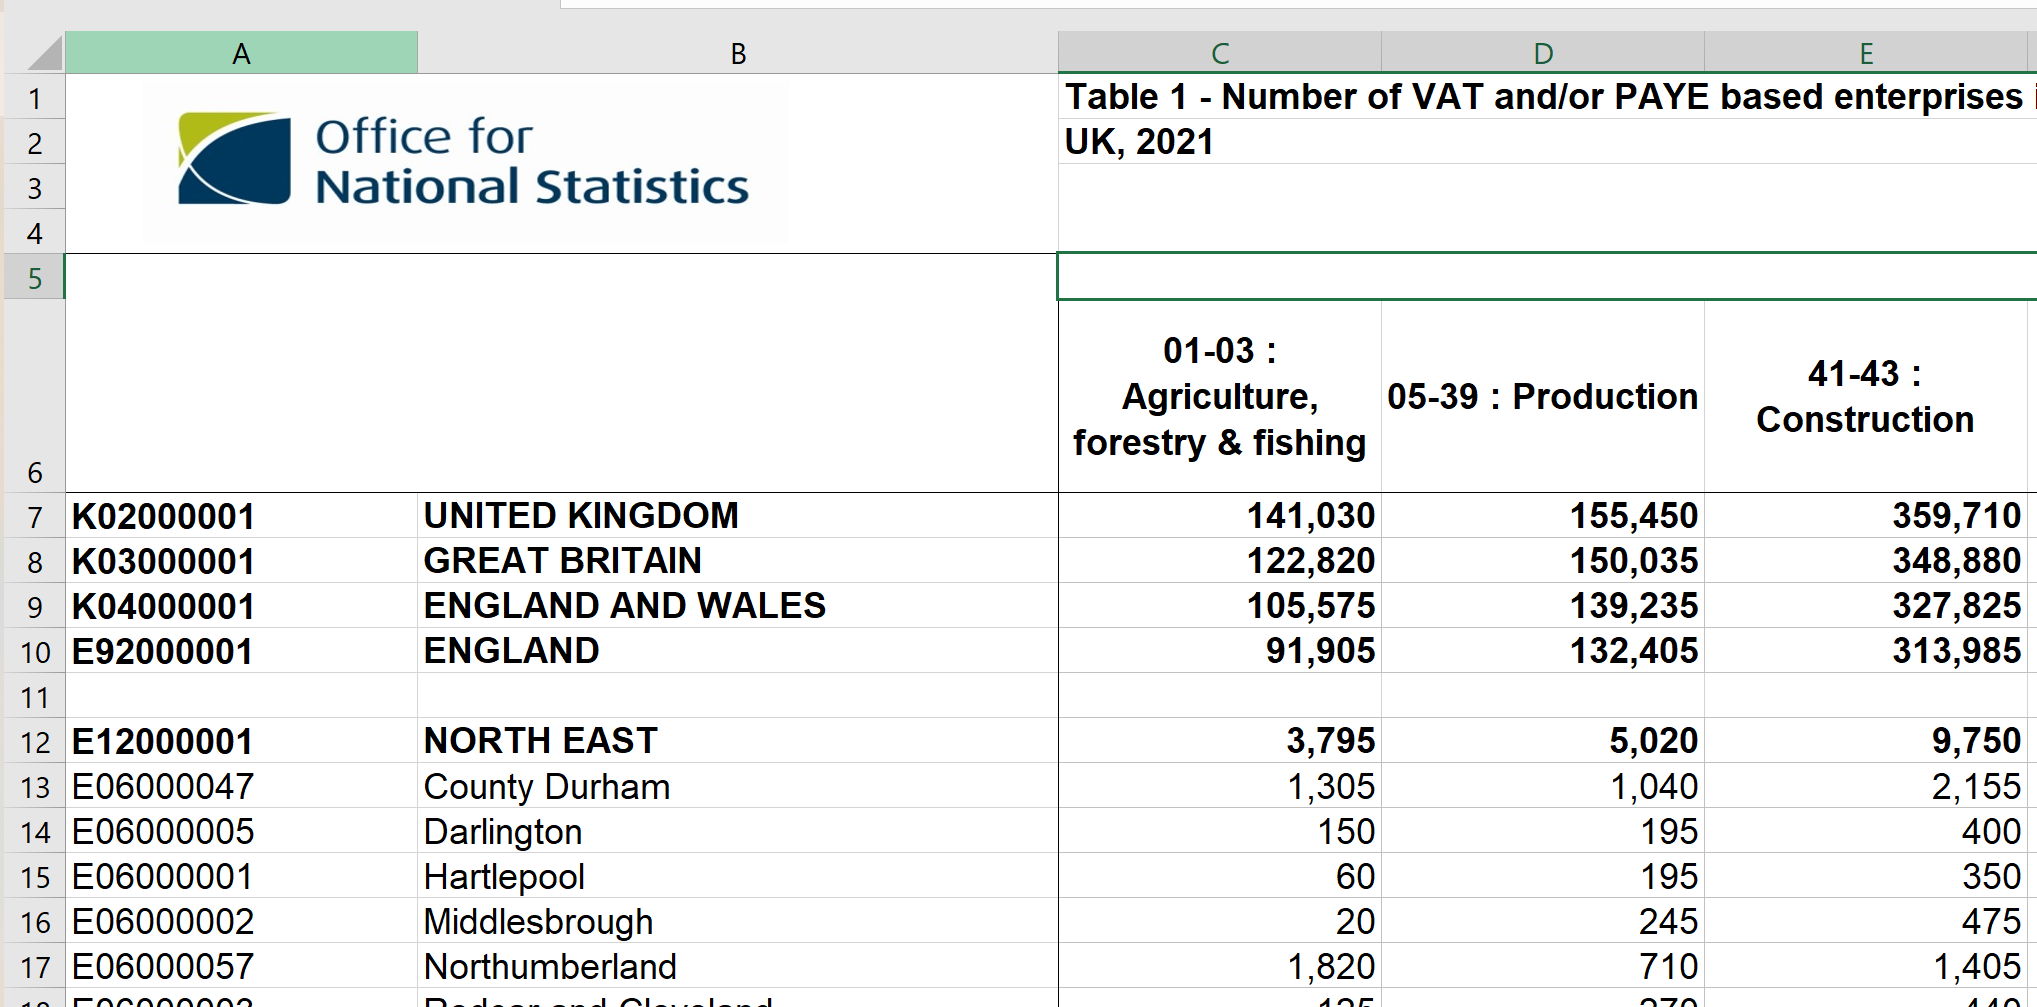

In [10]:
def get_sheet_info(ws: Worksheet) -> SheetInfo:
    header_col = get_header_col(ws)
    return {
        'title': ws.cell(1, header_col+1).value,
        'subtitle': ws.cell(2, header_col+1).value,
        'title_rows': [4, 5],
        'index_cols': list(range(header_col))
    }

In [11]:
sheet_info = get_sheet_info(sheet)
sheet_info

{'title': 'Table 1 - Number of VAT and/or PAYE based enterprises in districts, counties and unitary authorities within region and country by broad industry group',
 'subtitle': 'UK, 2021',
 'title_rows': [4, 5],
 'index_cols': [0, 1]}

# Sheet Data

Now can use pandas to gather sheets data

In [12]:
df = pandas.read_excel(
    FILENAME,
    sheet_name=SAMPLE_SHEET,
    header=sheet_info['title_rows'],
    index_col=sheet_info['index_cols']
)

In [13]:
df

Broad Industry Group  \
                                                             01-03 : Agriculture, forestry & fishing   
K02000001                              UNITED KINGDOM                                       141030.0   
K03000001                              GREAT BRITAIN                                        122820.0   
K04000001                              ENGLAND AND WALES                                    105575.0   
E92000001                              ENGLAND                                               91905.0   
                                       ENGLAND                                                   NaN   
...                                                                                              ...   
Data as at March 2021                  Newry Mourne and Down                                     NaN   
                                       Newry Mourne and Down                                     NaN   
Source: Office for National Statistics Newry Mourne and Down                                     NaN   
                                       Newry Mourne and Down                                     NaN   
Back to contents page                  Newry Mourne and Down                                     NaN   

                                                                                 \
                                                             05-39 : Production   
K02000001                              UNITED KINGDOM                  155450.0   
K03000001                              GREAT BRITAIN                   150035.0   
K04000001                              ENGLAND AND WALES               139235.0   
E92000001                              ENGLAND                         132405.0   
                                       ENGLAND                              NaN   
...                                                                         ...   
Data as at March 2021                  Newry Mourne and Down                NaN   
                                       Newry Mourne and Down                NaN   
Source: Office for National Statistics Newry Mourne and Down                NaN   
                                       Newry Mourne and Down                NaN   
Back to contents page                  Newry Mourne and Down                NaN   

                                                                                   \
                                                             41-43 : Construction   
K02000001                              UNITED KINGDOM                    359710.0   
K03000001                              GREAT BRITAIN                     348880.0   
K04000001                              ENGLAND AND WALES                 327825.0   
E92000001                              ENGLAND                           313985.0   
                                       ENGLAND                                NaN   
...                                                                           ...   
Data as at March 2021                  Newry Mourne and Down                  NaN   
                                       Newry Mourne and Down                  NaN   
Source: Office for National Statistics Newry Mourne and Down                  NaN   
                                       Newry Mourne and Down                  NaN   
Back to contents page                  Newry Mourne and Down                  NaN   

                                                                                \
                                                             45 : Motor trades   
K02000001                              UNITED KINGDOM                  78995.0   
K03000001                              GREAT BRITAIN                   76245.0   
K04000001                              ENGLAND AND WALES               71465.0   
E92000001                              ENGLAND                         67675.0   
                                       ENGLAND   

Now get rid of invalid rows with `nan`

In [14]:
df2 = df.dropna()

In [15]:
df2

Broad Industry Group  \
                                  01-03 : Agriculture, forestry & fishing   
K02000001 UNITED KINGDOM                                         141030.0   
K03000001 GREAT BRITAIN                                          122820.0   
K04000001 ENGLAND AND WALES                                      105575.0   
E92000001 ENGLAND                                                 91905.0   
E12000001 NORTH EAST                                               3795.0   
...                                                                   ...   
N09000006 Fermanagh and Omagh                                      3715.0   
N09000007 Lisburn and Castlereagh                                   630.0   
N09000008 Mid and East Antrim                                      1400.0   
N09000009 Mid Ulster                                               3260.0   
N09000010 Newry Mourne and Down                                    2345.0   

                                                                           \
                                  05-39 : Production 41-43 : Construction   
K02000001 UNITED KINGDOM                    155450.0             359710.0   
K03000001 GREAT BRITAIN                     150035.0             348880.0   
K04000001 ENGLAND AND WALES                 139235.0             327825.0   
E92000001 ENGLAND                           132405.0             313985.0   
E12000001 NORTH EAST                          5020.0               9750.0   
...                                              ...                  ...   
N09000006 Fermanagh and Omagh                  465.0               1140.0   
N09000007 Lisburn and Castlereagh              420.0                670.0   
N09000008 Mid and East Antrim                  380.0                655.0   
N09000009 Mid Ulster                           870.0               1585.0   
N09000010 Newry Mourne and Down                645.0               1630.0   

                                                                    \
                                  45 : Motor trades 46 : Wholesale   
K02000001 UNITED KINGDOM                    78995.0       106740.0   
K03000001 GREAT BRITAIN                     76245.0       103555.0   
K04000001 ENGLAND AND WALES                 71465.0        98330.0   
E92000001 ENGLAND                           67675.0        95105.0   
E12000001 NORTH EAST                         2495.0         2230.0   
...                                             ...            ...   
N09000006 Fermanagh and Omagh                 290.0          255.0   
N09000007 Lisburn and Castlereagh             220.0          340.0   
N09000008 Mid and East Antrim                 210.0          180.0   
N09000009 Mid Ulster                          350.0          340.0   
N09000010 Newry Mourne and Down               310.0          390.0   

                                               \
                                  47 : Retail   
K02000001 UNITED KINGDOM             220685.0   
K03000001 GREAT BRITAIN              214865.0   
K04000001 ENGLAND AND WALES          201270.0   
E92000001 ENGLAND                    192870.0   
E12000001 NORTH EAST                   6090.0   
...                                       ...   
N09000006 Fermanagh and Omagh           515.0   
N09000007 Lisburn and Castlereagh       340.0   
N09000008 Mid and East Antrim           365.0   
N09000009 Mid Ulster                    570.0   
N09000010 Newry Mourne and Down         670.0   

                                                                            \
                                  49-53 : Transport & Storage (inc postal)   
K02000001 UNITED KINGDOM                                          138405.0   
K03000001 GREAT BRITAIN                                           135210.0   
K04000001 ENGLAND AND WALES                                       128630.0   
E92000001 ENGLAND                                                 122760.0   
E12000001 NORTH EAST            

Now, filter out column titles if any contain "Total" (column headers are multi-level)

In [16]:
df3 = df2[[x for x in df2.columns if not any(t=='Total' for t in x)]]
df3

Broad Industry Group  \
                                  01-03 : Agriculture, forestry & fishing   
K02000001 UNITED KINGDOM                                         141030.0   
K03000001 GREAT BRITAIN                                          122820.0   
K04000001 ENGLAND AND WALES                                      105575.0   
E92000001 ENGLAND                                                 91905.0   
E12000001 NORTH EAST                                               3795.0   
...                                                                   ...   
N09000006 Fermanagh and Omagh                                      3715.0   
N09000007 Lisburn and Castlereagh                                   630.0   
N09000008 Mid and East Antrim                                      1400.0   
N09000009 Mid Ulster                                               3260.0   
N09000010 Newry Mourne and Down                                    2345.0   

                                                                           \
                                  05-39 : Production 41-43 : Construction   
K02000001 UNITED KINGDOM                    155450.0             359710.0   
K03000001 GREAT BRITAIN                     150035.0             348880.0   
K04000001 ENGLAND AND WALES                 139235.0             327825.0   
E92000001 ENGLAND                           132405.0             313985.0   
E12000001 NORTH EAST                          5020.0               9750.0   
...                                              ...                  ...   
N09000006 Fermanagh and Omagh                  465.0               1140.0   
N09000007 Lisburn and Castlereagh              420.0                670.0   
N09000008 Mid and East Antrim                  380.0                655.0   
N09000009 Mid Ulster                           870.0               1585.0   
N09000010 Newry Mourne and Down                645.0               1630.0   

                                                                    \
                                  45 : Motor trades 46 : Wholesale   
K02000001 UNITED KINGDOM                    78995.0       106740.0   
K03000001 GREAT BRITAIN                     76245.0       103555.0   
K04000001 ENGLAND AND WALES                 71465.0        98330.0   
E92000001 ENGLAND                           67675.0        95105.0   
E12000001 NORTH EAST                         2495.0         2230.0   
...                                             ...            ...   
N09000006 Fermanagh and Omagh                 290.0          255.0   
N09000007 Lisburn and Castlereagh             220.0          340.0   
N09000008 Mid and East Antrim                 210.0          180.0   
N09000009 Mid Ulster                          350.0          340.0   
N09000010 Newry Mourne and Down               310.0          390.0   

                                               \
                                  47 : Retail   
K02000001 UNITED KINGDOM             220685.0   
K03000001 GREAT BRITAIN              214865.0   
K04000001 ENGLAND AND WALES          201270.0   
E92000001 ENGLAND                    192870.0   
E12000001 NORTH EAST                   6090.0   
...                                       ...   
N09000006 Fermanagh and Omagh           515.0   
N09000007 Lisburn and Castlereagh       340.0   
N09000008 Mid and East Antrim           365.0   
N09000009 Mid Ulster                    570.0   
N09000010 Newry Mourne and Down         670.0   

                                                                            \
                                  49-53 : Transport & Storage (inc postal)   
K02000001 UNITED KINGDOM                                          138405.0   
K03000001 GREAT BRITAIN                                           135210.0   
K04000001 ENGLAND AND WALES                                       128630.0   
E92000001 ENGLAND                                                 122760.0   
E12000001 NORTH EAST            

# Regional Codes

The regional codes as the first index are all mixed in together - "districts, counties and unitary authorities within region and country"

The following below maps disctricts to regions - link used to download CSV is [here](https://geoportal.statistics.gov.uk/datasets/ons::local-authority-district-to-region-april-2021-lookup-in-england/about)

In [18]:
df_lookup = pandas.read_csv(r"excel-files/Local_Authority_District_to_Region_(April_2021)_Lookup_in_England.csv")

In [19]:
df_lookup

,FID,LAD21CD,LAD21NM,RGN21CD,RGN21NM
0,1,E06000001,Hartlepool,E12000001,North East
1,2,E06000011,East Riding of Yorkshire,E12000003,Yorkshire and The Humber
2,3,E06000002,Middlesbrough,E12000001,North East
3,4,E06000003,Redcar and Cleveland,E12000001,North East
4,5,E06000012,North East Lincolnshire,E12000003,Yorkshire and The Humber
...,...,...,...,...,...
304,305,E09000022,Lambeth,E12000007,London
305,306,E09000023,Lewisham,E12000007,London
306,307,E09000024,Merton,E12000007,London
307,308,E09000025,Newham,E12000007,London


Can see below that it is mapping "E06" through "E09" codes to "E12" codes

In [22]:
df_lookup['LAD21CD'].apply(lambda x: x[:3]).unique()

array(['E06', 'E07', 'E08', 'E09'], dtype=object)

In [24]:
df_lookup['RGN21CD'].apply(lambda x: x[:3]).unique()

array(['E12'], dtype=object)

However, **this is too broad**, the excel files goes one level deeper in that there are regions -> counties -> disctricts

Can see [from the file here](https://geoportal.statistics.gov.uk/datasets/ons::local-authority-district-to-county-april-2021-lookup-in-england/about) to map districts to counties 

In [27]:
df_lookup2 = pandas.read_csv("excel-files/Local_Authority_District_to_County_(April_2021)_Lookup_in_England.csv")

In [28]:
df_lookup2

,FID,LAD21CD,LAD21NM,CTY21CD,CTY21NM
0,1,E07000008,Cambridge,E10000003,Cambridgeshire
1,2,E07000009,East Cambridgeshire,E10000003,Cambridgeshire
2,3,E07000134,North West Leicestershire,E10000018,Leicestershire
3,4,E07000010,Fenland,E10000003,Cambridgeshire
4,5,E07000135,Oadby and Wigston,E10000018,Leicestershire
...,...,...,...,...,...
245,246,E09000024,Merton,E13000002,Outer London
246,247,E09000026,Redbridge,E13000002,Outer London
247,248,E09000027,Richmond upon Thames,E13000002,Outer London
248,249,E09000029,Sutton,E13000002,Outer London


In [29]:
df_lookup2['LAD21CD'].apply(lambda x: x[:3]).unique()

array(['E07', 'E08', 'E09'], dtype=object)

Note that normally, there is a region (E12), then a county (E10), then a district (E06/E07/E08/E09) 

- in the case below, the districts e.g. (E06000011) map **directly** to the region (E12)

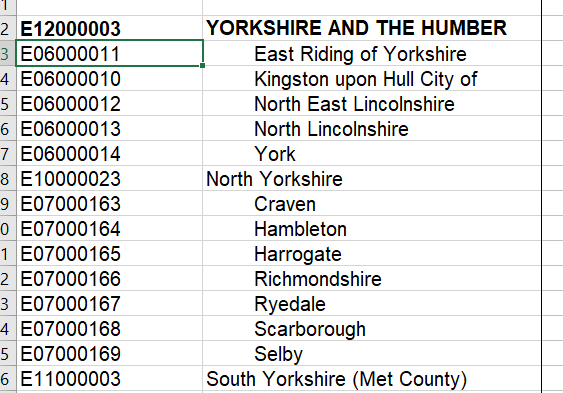